<a href="https://colab.research.google.com/github/Entro01/ML-starter/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
words = open('names.txt', 'r').read().splitlines()

In [47]:
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [48]:
print(min(len(x) for x in words))
print(max(len(x) for x in words))

2
15


In [49]:
#bigram - only dealing with two characters at a time, always looking at the previous characater to predict the next one.

b = {}
for x in words:
  x = ['<S>'] + list(x) + ['<E>']
  for i,j in zip(x, x[1:]):
    biagram = (i, j)
    b[biagram] = b.get(biagram, 0) + 1
print(b)

{('<S>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<E>'): 6640, ('<S>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<S>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<S>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<S>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<S>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<E>'): 3983, ('<S>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<S>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<E>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<E>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1345,

In [ ]:
sorted(b.items(), key = lambda k : -k[1])

In [51]:
import torch

N = torch.zeros((27, 27), dtype = torch.int32)

In [52]:
chrs = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i,s in enumerate(chrs)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [58]:
for x in words:
  x = ['.'] + list(x) + ['.']
  for i,j in zip(x, x[1:]):
    ii = stoi[i]
    ji = stoi[j]
    N[ii, ji] += 1

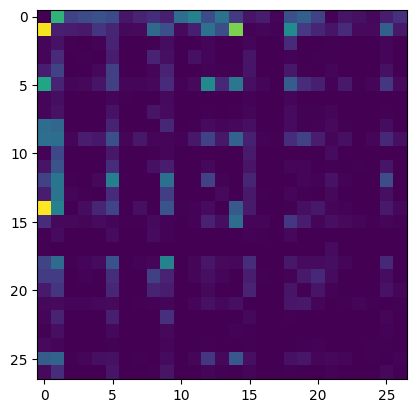

In [54]:
import matplotlib.pyplot as plt

plt.imshow(N)

In [85]:
P = N.float()
P = P / P.sum(1, keepdim = True)

In [87]:
P[0].sum()

tensor(1.)

In [89]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  ix = 0
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
